<h1><center>Introductory Data Analysis Workflow</center></h1>


## Step 1: Checking the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import scipy.stats as stats

In [2]:

loan_data = pd.read_excel('Loan.xls')


In [3]:
#lets take a look at the first 5 rows
loan_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  134988374      20000        20000            20000    36      7.46   
1  135249858       9500         9500             9500    36     16.46   
2  135881014      11200        11200            11200    60     28.72   
3  134937497      30000        30000            30000    36     14.52   
4  136056743      20000        20000            20000    36     15.49   

   installment grade                   emp_title home_ownership  annual_inc  \
0       621.76     A         Nurse Practitioner        MORTGAGE    150000.0   
1       336.16     C                         NaN           RENT     41000.0   
2       353.61     F                     Cashier           RENT     31000.0   
3      1032.93     C  Quality Assurance Engineer           RENT    104000.0   
4       698.12     C       Respiratory Therapist            OWN     65000.0   

  issue_d loan_status                    title  delinq_2yrs  
0    June     Current  Credit card refinancing            1  
1    June     Current    Moving and relocation            0  
2    June     Current                    Other            1  
3    June  Fully Paid              Home buying            0  
4    June     Current       Debt consolidation            0

In [4]:
# Last rows of the table
loan_data.tail()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
65528  133420689      10000        10000            10000    60     11.05   
65529  133303365      35000        35000            35000    36     13.06   
65530  133427412      12000        12000            12000    60     13.06   
65531  133342142       4000         4000             4000    36     14.03   
65532  133353493      17500        17500            17500    60     18.45   

       installment grade                        emp_title home_ownership  \
65528       217.68     B                     Tax Examiner            OWN   
65529      1180.31     C  Senior Computer Technologist II           RENT   
65530       273.41     C               Finance Specialist           RENT   
65531       136.77     C               District Secretary           RENT   
65532       448.69     D                Kennell attendant       MORTGAGE   

       annual_inc issue_d loan_status               title  delinq_2yrs  
65528     56471.0     May  Fully Paid  Debt consolidation            0  
65529    200000.0     May     Current  Debt consolidation            0  
65530     65000.0     May     Current  Debt consolidation            0  
65531     43000.0     May     Current  Debt consolidation            0  
65532     20000.0     May     Current  Debt consolidation            0

In [5]:
# we have 65 thousand rows and 15 columns
loan_data.shape

(65533, 15)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 15 columns):
id                 65533 non-null int64
loan_amnt          65533 non-null int64
funded_amnt        65533 non-null int64
funded_amnt_inv    65533 non-null int64
term               65533 non-null int64
int_rate           65533 non-null float64
installment        65533 non-null float64
grade              65533 non-null object
emp_title          60257 non-null object
home_ownership     65533 non-null object
annual_inc         65533 non-null float64
issue_d            65533 non-null object
loan_status        65533 non-null object
title              65533 non-null object
delinq_2yrs        65533 non-null int64
dtypes: float64(3), int64(6), object(6)
memory usage: 7.5+ MB


In [7]:
# with na_values we can pass what cells to mark as na
loan_data = pd.read_excel('Loan.xls', na_values=['NA', 'N/A'])

In [8]:
loan_data.describe()

id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  6.553300e+04  65533.000000  65533.000000     65533.000000   
mean   1.344574e+08  15896.200006  15896.200006     15893.219447   
std    8.891675e+05  10130.503552  10130.503552     10129.724244   
min    1.275498e+08   1000.000000   1000.000000      1000.000000   
25%    1.338281e+08   8000.000000   8000.000000      8000.000000   
50%    1.345048e+08  13350.000000  13350.000000     13325.000000   
75%    1.350921e+08  21000.000000  21000.000000     21000.000000   
max    1.360671e+08  40000.000000  40000.000000     40000.000000   

               term      int_rate   installment    annual_inc   delinq_2yrs  
count  65533.000000  65533.000000  65533.000000  6.553300e+04  65533.000000  
mean      43.219080     12.582355    462.678926  7.900735e+04      0.235683  
std       11.006573      5.099397    285.719111  9.297930e+04      0.747913  
min       36.000000      5.310000     30.120000  0.000000e+00      0.000000  
25%       36.000000      8.080000    250.990000  4.500000e+04      0.000000  
50%       36.000000     12.130000    382.510000  6.500000e+04      0.000000  
75%       60.000000     15.490000    627.470000  9.500000e+04      0.000000  
max       60.000000     30.990000   1628.080000  9.300000e+06     23.000000

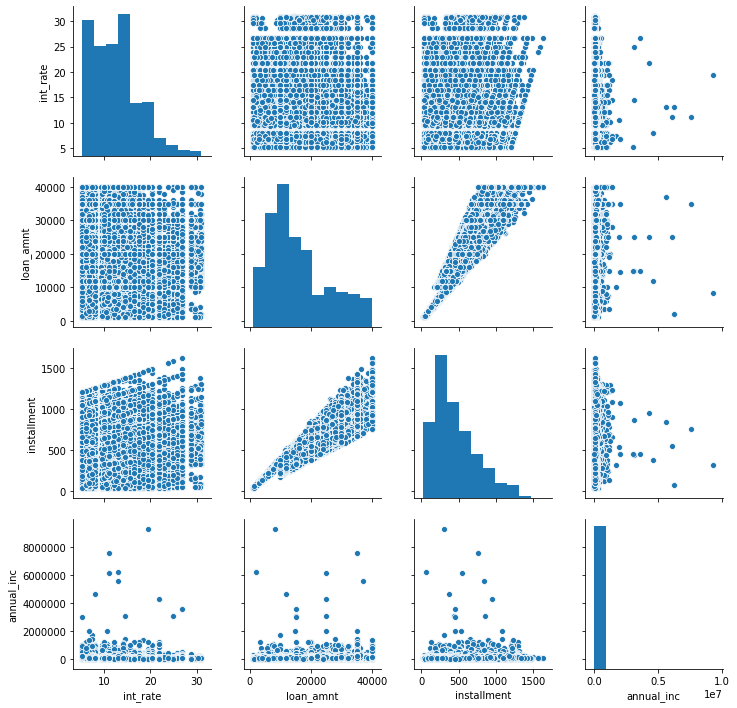

In [9]:
sb.pairplot(loan_data[["int_rate","loan_amnt","installment","annual_inc"]])

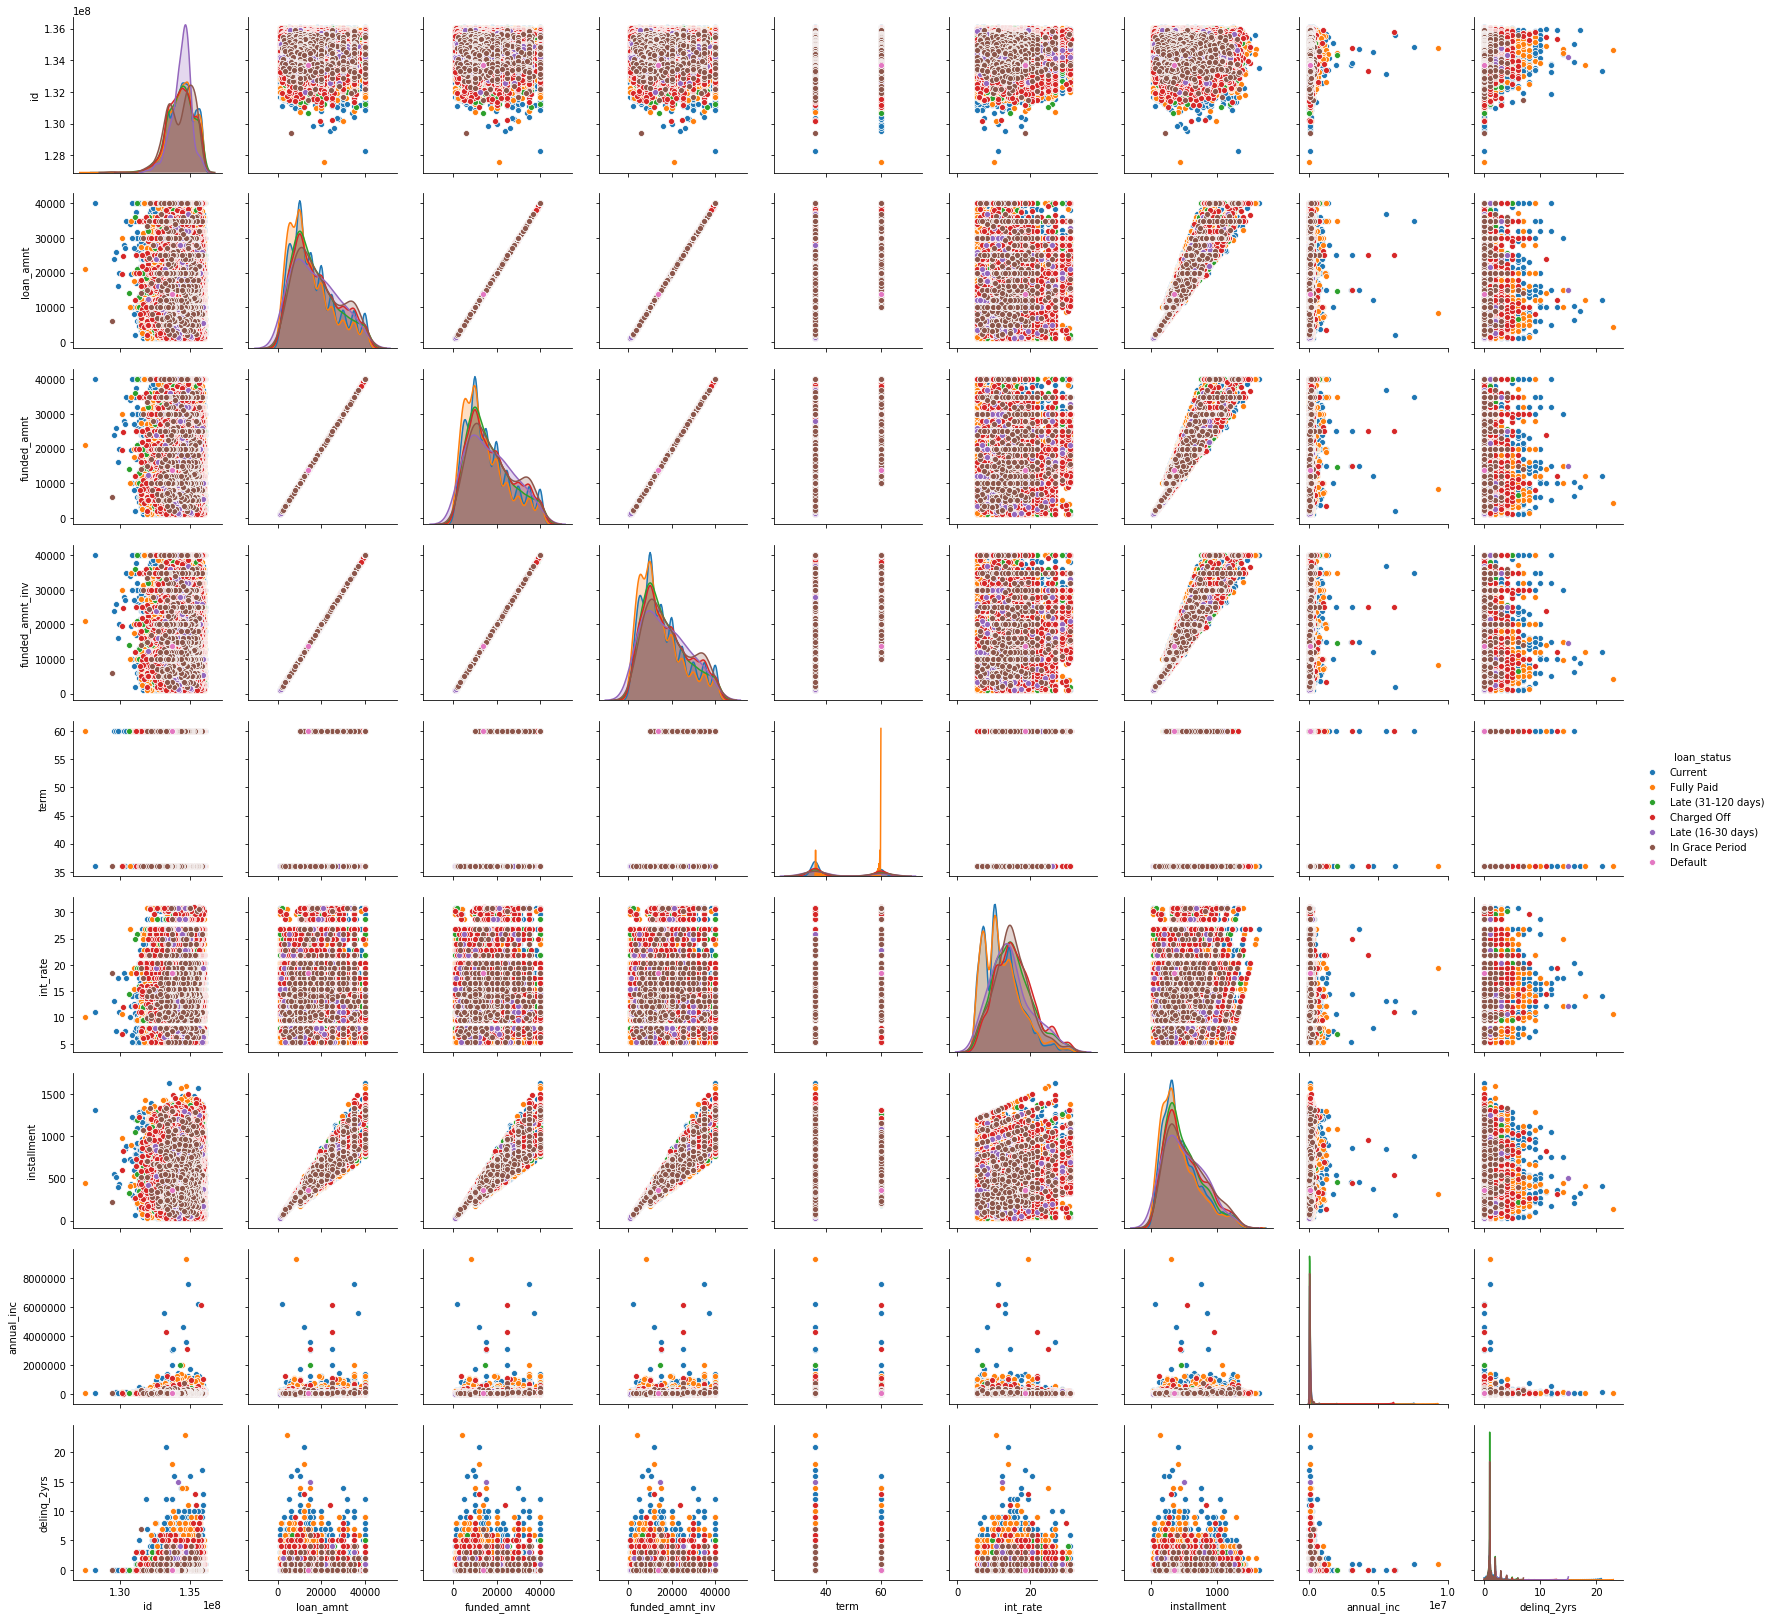

In [11]:
sb.pairplot(loan_data, hue='loan_status')

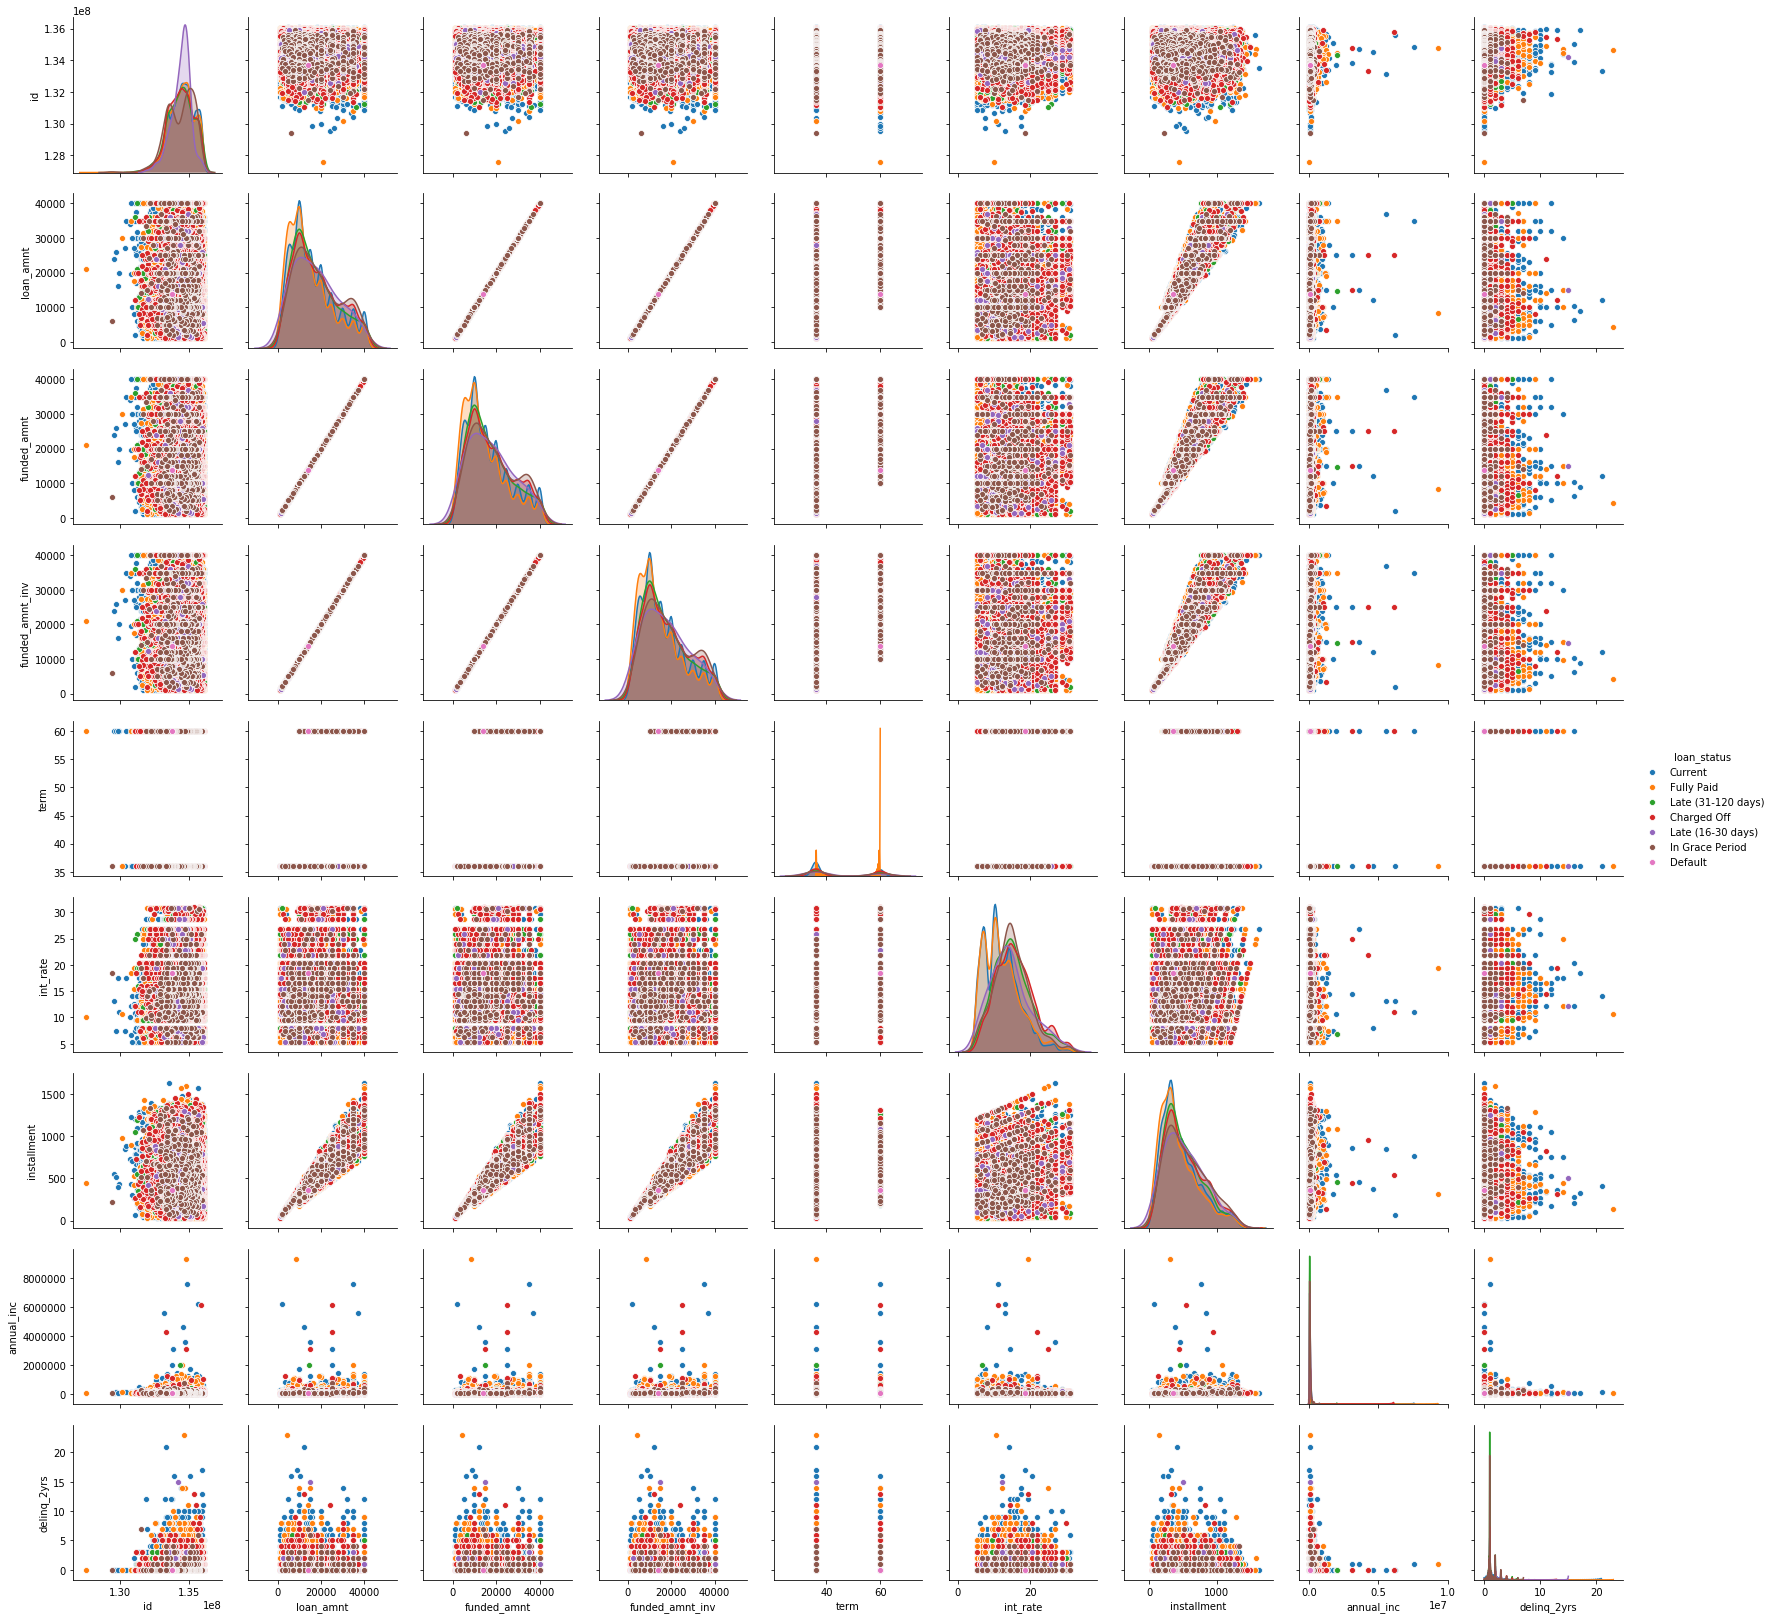

In [12]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(loan_data.dropna(), hue='loan_status')


## Step 3: Tidying the data

In [3]:
loan_data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [4]:
len(loan_data['loan_status'].unique())

7

In [5]:
# Copy and Replace
# in df.loc[rows, thencolumns]
loan_data.loc[loan_data['loan_status'] == 'Late (31-120 days)', 'loan_status'] = 'Charged Off'
loan_data['loan_status'].unique()


array(['Current', 'Fully Paid', 'Charged Off', 'Late (16-30 days)',
       'In Grace Period', 'Default'], dtype=object)

In [6]:
# Copy and Replace
# in df.loc[rows, thencolumns]
loan_data.loc[loan_data['loan_status'] == 'Late (16-30 days)', 'loan_status'] = 'Charged Off'
loan_data['loan_status'].unique()


array(['Current', 'Fully Paid', 'Charged Off', 'In Grace Period',
       'Default'], dtype=object)

In [7]:
# Copy and Replace
# in df.loc[rows, thencolumns]
loan_data.loc[loan_data['loan_status'] == 'Default', 'loan_status'] = 'Charged Off'
loan_data['loan_status'].unique()


array(['Current', 'Fully Paid', 'Charged Off', 'In Grace Period'],
      dtype=object)

In [8]:
# We drop "Current"
loan_data.drop(loan_data[loan_data['loan_status'] == "Current"].index, inplace = True) 
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'In Grace Period'], dtype=object)

In [9]:
# We drop "In grace period"
loan_data.drop(loan_data[loan_data['loan_status'] == "In Grace Period"].index, inplace = True) 
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [56]:
# Now we have only two groups: "Fully paid" and "Charged off"
loan_data.tail()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
65516  133424372      40000        40000            40000    36      5.31   
65517  133279749      12000        12000            12000    36     14.52   
65519  132871073       8500         8500             8500    36     23.87   
65521  133348211      22000        22000            22000    36      5.31   
65528  133420689      10000        10000            10000    60     11.05   

       installment grade                 emp_title home_ownership  annual_inc  \
65516      1204.42     A  Senior forensic engineer       MORTGAGE    138000.0   
65517       413.17     C           Kitchen Manager           RENT     56500.0   
65519       332.90     E           general manager       MORTGAGE     65000.0   
65521       662.43     A         Director of Sales       MORTGAGE    215000.0   
65528       217.68     B              Tax Examiner            OWN     56471.0   

      issue_d  loan_status                    title  delinq_2yrs  
65516     May   Fully Paid       Debt consolidation            0  
65517     May   Fully Paid  Credit card refinancing            0  
65519     May  Charged Off       Debt consolidation            0  
65521     May   Fully Paid       Debt consolidation            0  
65528     May   Fully Paid       Debt consolidation            0

In [57]:
loan_data[98:103]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
331  136014073      28000        28000            28000    36      6.19   
335  135404063      22000        22000            22000    60     17.47   
339  136015968       7200         7200             7200    36     10.56   
352  136019681      15000        15000            15000    36     10.07   
353  135706529      40000        40000            40000    36     10.56   

     installment grade                 emp_title home_ownership  annual_inc  \
331       854.23     A       VP, Controls Office       MORTGAGE    122000.0   
335       552.34     D                     Clerk           RENT     37240.0   
339       234.23     B                 Inspector       MORTGAGE     60000.0   
352       484.51     B  Field Services Engineer        MORTGAGE    186000.0   
353      1301.23     B                       NaN       MORTGAGE     27408.0   

    issue_d  loan_status                    title  delinq_2yrs  
331    June   Fully Paid       Debt consolidation            0  
335    June   Fully Paid                    Other            0  
339    June   Fully Paid       Debt consolidation            0  
352    June   Fully Paid  Credit card refinancing            0  
353    June  Charged Off       Debt consolidation            0

In [10]:
# Now we have only two groups: "Fully paid" and "Charged off"
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

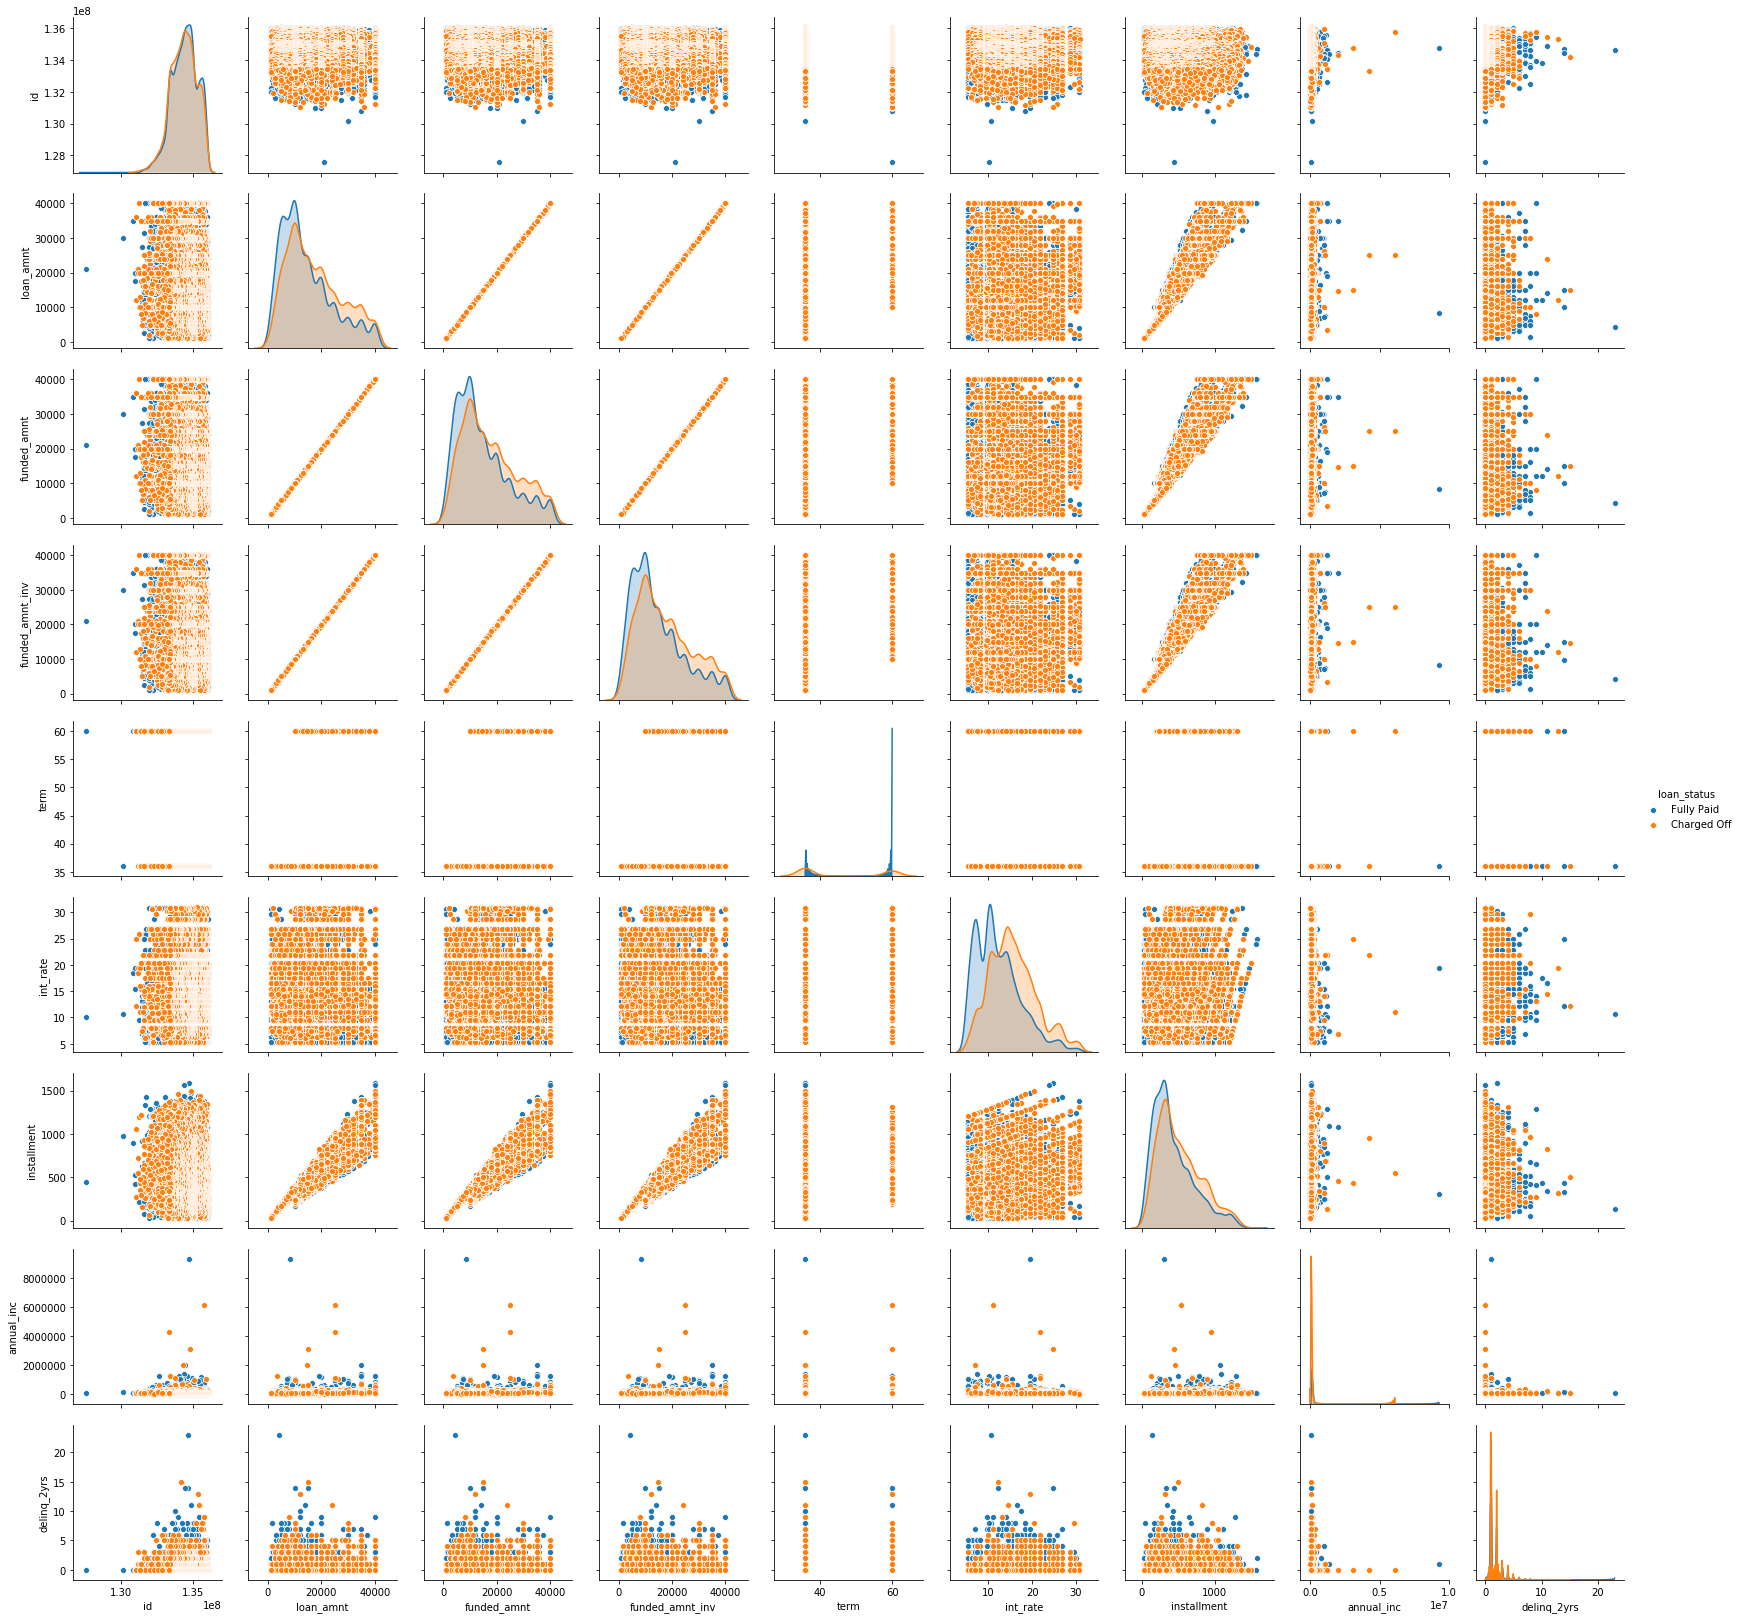

In [23]:
sb.pairplot(loan_data.dropna(), hue='loan_status')

In [59]:
loan_data.shape

(21462, 15)

In [11]:
loan_data.loc[(loan_data['annual_inc'] > 1000000)]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
5835   135799754      25000        25000            25000    60     11.05   
8675   135558778      20000        20000            20000    36     14.03   
24922  134968633       7500         7500             7500    36     10.56   
27412  134782439      15000        15000            15000    60     24.84   
27571  133328123      25000        25000            25000    36     21.85   
28265  134767124       8400         8400             8400    36     19.42   
34851  134627209      40000        40000            40000    36     10.07   
37979  134445875      35000        35000            35000    36      6.83   
39302  134388112      35000        35000            35000    36      7.46   
40807  134336861      14725        14725            14725    36      6.83   
44438  134359443      10000        10000             9975    36     20.39   
44455  134217977      28000        28000            28000    36      5.31   
48209  134063788      35000        35000            35000    60     12.13   
50254  134107525       7200         7200             7200    36     15.49   
50635  133413923       3500         3500             3500    36     21.85   
50832  132632128      19000        19000            19000    60     19.42   
58574  133744245      25000        25000            25000    60     21.85   

       installment grade                emp_title home_ownership  annual_inc  \
5835        544.19     B                 Foremen        MORTGAGE   6118054.0   
8675        683.85     C            Administrator       MORTGAGE   1181708.0   
24922       243.99     B         Business Analyst            OWN   1104000.0   
27412       438.87     E  Patient Care Specialist       MORTGAGE   3098500.0   
27571       952.83     D               Instructor            OWN   4260016.0   
28265       309.70     D  Quality Mission Officer           RENT   9300000.0   
34851      1292.01     B                    owner            OWN   1250000.0   
37979      1077.99     A           Vice President       MORTGAGE   2000000.0   
39302      1088.08     A  Intelligence Specialist       MORTGAGE   1400000.0   
40807       453.53     A                      CIO       MORTGAGE   2000000.0   
44438       373.63     D           Branch Manager           RENT   1020000.0   
44455       843.09     A          Canine Handler             OWN   1020000.0   
48209       780.86     B         DVT Coordinator        MORTGAGE   1200000.0   
50254       251.33     C                   Driver           RENT   1008000.0   
50635       133.40     D                  Teacher           RENT   1200000.0   
50832       497.28     D      Outbound supervisor       MORTGAGE   1200000.0   
58574       688.35     D                  Manager           RENT   1080000.0   

      issue_d  loan_status                    title  delinq_2yrs  
5835     June  Charged Off       Debt consolidation            0  
8675     June   Fully Paid         Home improvement            0  
24922    June   Fully Paid       Debt consolidation            1  
27412    June  Charged Off  Credit card refinancing            0  
27571    June  Charged Off                    Other            0  
28265    June   Fully Paid       Debt consolidation            1  
34851    June   Fully Paid              Home buying            0  
37979    June   Fully Paid         Home improvement            0  
39302    June   Fully Paid       Debt consolidation            1  
40807    June  Charged Off  Credit card refinancing            0  
44438    June   Fully Paid       Debt consolidation            4  
44455     May   Fully Paid       Debt consolidation            0  
48209     May   Fully Paid       Debt consolidation            0  
50254     May   Fully Paid                    Other            0  
50635     May  Charged Off           Major purchase            0  
50832     May   Fully Paid       Debt consolidation            0  
58574     May  Charged Off                    O

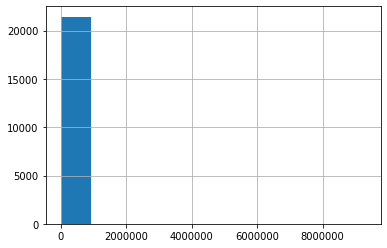

In [12]:
loan_data['annual_inc'].hist()

We drop these rows 

In [13]:
loan_data.drop(loan_data[loan_data['annual_inc'] >1000000].index, inplace = True)

In [14]:
loan_data.loc[(loan_data['annual_inc'] > 1000000)]

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, emp_title, home_ownership, annual_inc, issue_d, loan_status, title, delinq_2yrs]
Index: []

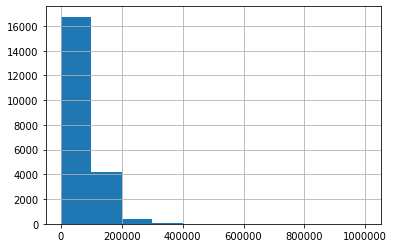

In [64]:
loan_data['annual_inc'].hist()

In [15]:
loan_data.loc[(loan_data['annual_inc'] <1000)]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
90     135828496      24000        24000            24000    36     19.42   
2983   135898536      11000        11000            11000    36     11.05   
4844   135260576       6925         6925             6925    36     13.06   
5492   135832514      30000        30000            30000    36     10.56   
5501   135451736      35000        35000            35000    60     24.84   
5959   135731615      28000        28000            27950    36     20.39   
7412   135666561      12000        12000            12000    60     17.47   
8402   134119262      32000        32000            32000    36     14.03   
8950   135429432      10000        10000            10000    60     30.17   
11104  135373165      33175        33175            33175    36     20.39   
11590  135543719      25000        25000            24725    36      9.58   
13114  135121061       8000         8000             8000    36     17.47   
13950  135354079      28125        28125            28125    36     17.47   
15091  135401190       8500         8500             8475    36     18.45   
15164  134779425      25000        25000            25000    36      5.31   
15192  135424407      14000        14000            14000    60     14.03   
15435  135432162      24000        24000            24000    60     21.85   
16204  135212202      20000        20000            20000    36      9.58   
16224  135260805       8000         8000             8000    36     12.13   
18363  135255082      28625        28625            28600    36     17.47   
19102  135208670      12000        12000            12000    36      6.83   
19337  134970218       6025         6025             6025    36     11.05   
19462  133496189      38225        38225            38225    60     11.05   
19782  135130465      10000        10000             9750    36     11.05   
20120  135063524      25975        25975            25975    36     11.05   
20192  135012245      33100        33100            33100    60     17.47   
20860  135033394      12975        12975            12975    36     13.06   
21679  135005213      30000        30000            30000    60     16.46   
22909  134893979       2000         2000             2000    36     22.90   
24313  134933714      12000        12000            12000    60     12.13   
...          ...        ...          ...              ...   ...       ...   
29227  134701998      15000        15000            15000    60     17.47   
30270  134807993      16000        16000            16000    60     21.85   
30913  134770074      28000        28000            28000    60     26.77   
31135  134672901      40000        40000            40000    36     19.42   
33494  134067930      10000        10000            10000    36      7.46   
35992  133778001       8650         8650             8650    36      9.58   
37767  134362846       8000         8000             8000    36     25.81   
38164  134438639       5000         5000             5000    36     13.06   
40771  134383078      19200        19200            19200    36      8.08   
41120  134389436      31175        31175            31175    36     19.42   
41837  134238082      35000        35000            35000    36     14.52   
41987  133226732      35000        35000            34975    36     26.77   
44427  134073937      35000        35000            35000    36     24.84   
48198  134028586      22000        22000            22000    60     14.03   
48547  134125316      16500        16500            16500    60     25.81   
48785  134080056      32000        32000            32000    60     25.81   
48908  134051160       7000         7000             7000    36     15.49   
50162  134028645      10000        10000            10000    60     17.47   
54781  133470857      20000        20000            20000    60     13.06   
54857  133771186       2100         2100             2100    36      8.08   
54986  133

In [16]:
annual_inc_avg = loan_data['annual_inc'].mean()
annual_inc_avg

76477.34022242948

In [17]:
type(annual_inc_avg)

float

In [18]:
round(annual_inc_avg,2)

76477.34

In [19]:
loan_data.loc[(loan_data['annual_inc'] <1000),
              'annual_inc'] = annual_inc_avg

In [20]:
loan_data.loc[(loan_data['annual_inc'] <1000)]

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, emp_title, home_ownership, annual_inc, issue_d, loan_status, title, delinq_2yrs]
Index: []

In [21]:
# we find all annual income with the average
loan_data.loc[loan_data['annual_inc'] == annual_inc_avg]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
90     135828496      24000        24000            24000    36     19.42   
2983   135898536      11000        11000            11000    36     11.05   
4844   135260576       6925         6925             6925    36     13.06   
5492   135832514      30000        30000            30000    36     10.56   
5501   135451736      35000        35000            35000    60     24.84   
5959   135731615      28000        28000            27950    36     20.39   
7412   135666561      12000        12000            12000    60     17.47   
8402   134119262      32000        32000            32000    36     14.03   
8950   135429432      10000        10000            10000    60     30.17   
11104  135373165      33175        33175            33175    36     20.39   
11590  135543719      25000        25000            24725    36      9.58   
13114  135121061       8000         8000             8000    36     17.47   
13950  135354079      28125        28125            28125    36     17.47   
15091  135401190       8500         8500             8475    36     18.45   
15164  134779425      25000        25000            25000    36      5.31   
15192  135424407      14000        14000            14000    60     14.03   
15435  135432162      24000        24000            24000    60     21.85   
16204  135212202      20000        20000            20000    36      9.58   
16224  135260805       8000         8000             8000    36     12.13   
18363  135255082      28625        28625            28600    36     17.47   
19102  135208670      12000        12000            12000    36      6.83   
19337  134970218       6025         6025             6025    36     11.05   
19462  133496189      38225        38225            38225    60     11.05   
19782  135130465      10000        10000             9750    36     11.05   
20120  135063524      25975        25975            25975    36     11.05   
20192  135012245      33100        33100            33100    60     17.47   
20860  135033394      12975        12975            12975    36     13.06   
21679  135005213      30000        30000            30000    60     16.46   
22909  134893979       2000         2000             2000    36     22.90   
24313  134933714      12000        12000            12000    60     12.13   
...          ...        ...          ...              ...   ...       ...   
29227  134701998      15000        15000            15000    60     17.47   
30270  134807993      16000        16000            16000    60     21.85   
30913  134770074      28000        28000            28000    60     26.77   
31135  134672901      40000        40000            40000    36     19.42   
33494  134067930      10000        10000            10000    36      7.46   
35992  133778001       8650         8650             8650    36      9.58   
37767  134362846       8000         8000             8000    36     25.81   
38164  134438639       5000         5000             5000    36     13.06   
40771  134383078      19200        19200            19200    36      8.08   
41120  134389436      31175        31175            31175    36     19.42   
41837  134238082      35000        35000            35000    36     14.52   
41987  133226732      35000        35000            34975    36     26.77   
44427  134073937      35000        35000            35000    36     24.84   
48198  134028586      22000        22000            22000    60     14.03   
48547  134125316      16500        16500            16500    60     25.81   
48785  134080056      32000        32000            32000    60     25.81   
48908  134051160       7000         7000             7000    36     15.49   
50162  134028645      10000        10000            10000    60     17.47   
54781  133470857      20000        20000            20000    60     13.06   
54857  133771186       2100         2100             2100    36      8.08   
54986  133

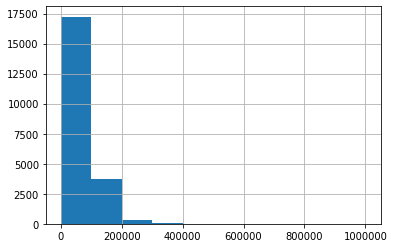

In [72]:
loan_data['annual_inc'].hist()

In [73]:
loan_data.shape

(21445, 15)

In [22]:
loan_data.loc[(loan_data['delinq_2yrs'] >10)]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
13257  135453033      24000        24000            24000    36     14.52   
17217  135356271      12000        12000            12000    60     19.42   
26923  134916384      14000        14000            14000    60     16.46   
33356  134711562      15000        15000            15000    60     24.84   
36479  134642597       4200         4200             4200    36     10.56   
38290  134193182      15000        15000            14750    36     12.13   
39563  134440545      10000        10000             9725    36     12.13   
60348  133707231      12000        12000            12000    36     14.03   

       installment grade                            emp_title home_ownership  \
13257       826.34     C                       Branch Manager       MORTGAGE   
17217       314.07     D                             Sale Rep       MORTGAGE   
26923       343.89     C                       Sr Finance Mgr       MORTGAGE   
33356       438.87     E                       Manager, FP&A        MORTGAGE   
36479       136.63     B  Sr. Coordinator, Contract & Billing           RENT   
38290       499.15     B                              Teacher       MORTGAGE   
39563       332.77     B                     HEDIS Analyst Sr           RENT   
60348       410.31     C                                  NaN            OWN   

       annual_inc issue_d  loan_status                    title  delinq_2yrs  
13257    170000.0    June  Charged Off       Debt consolidation           11  
17217     68000.0    June  Charged Off       Debt consolidation           13  
26923    145000.0    June   Fully Paid       Debt consolidation           11  
33356    138000.0    June   Fully Paid         Medical expenses           14  
36479     40000.0    June   Fully Paid  Credit card refinancing           23  
38290     55000.0    June  Charged Off                    Other           15  
39563    100000.0    June   Fully Paid                    Other           14  
60348     72000.0     May   Fully Paid                    Other           18

In [23]:
delinq_2yrs_avg = loan_data['delinq_2yrs'].mean()
delinq_2yrs_avg

0.2463044998834227

In [24]:
round(delinq_2yrs_avg,2)

0.25

In [25]:
loan_data.loc[(loan_data['delinq_2yrs'] >10),
              'delinq_2yrs'] = delinq_2yrs_avg

In [26]:
loan_data.loc[(loan_data['delinq_2yrs'] >10)]

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, emp_title, home_ownership, annual_inc, issue_d, loan_status, title, delinq_2yrs]
Index: []

In [27]:
# we find all delinq_2yrs with the average
loan_data.loc[loan_data['delinq_2yrs'] == delinq_2yrs_avg]

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
13257  135453033      24000        24000            24000    36     14.52   
17217  135356271      12000        12000            12000    60     19.42   
26923  134916384      14000        14000            14000    60     16.46   
33356  134711562      15000        15000            15000    60     24.84   
36479  134642597       4200         4200             4200    36     10.56   
38290  134193182      15000        15000            14750    36     12.13   
39563  134440545      10000        10000             9725    36     12.13   
60348  133707231      12000        12000            12000    36     14.03   

       installment grade                            emp_title home_ownership  \
13257       826.34     C                       Branch Manager       MORTGAGE   
17217       314.07     D                             Sale Rep       MORTGAGE   
26923       343.89     C                       Sr Finance Mgr       MORTGAGE   
33356       438.87     E                       Manager, FP&A        MORTGAGE   
36479       136.63     B  Sr. Coordinator, Contract & Billing           RENT   
38290       499.15     B                              Teacher       MORTGAGE   
39563       332.77     B                     HEDIS Analyst Sr           RENT   
60348       410.31     C                                  NaN            OWN   

       annual_inc issue_d  loan_status                    title  delinq_2yrs  
13257    170000.0    June  Charged Off       Debt consolidation     0.246304  
17217     68000.0    June  Charged Off       Debt consolidation     0.246304  
26923    145000.0    June   Fully Paid       Debt consolidation     0.246304  
33356    138000.0    June   Fully Paid         Medical expenses     0.246304  
36479     40000.0    June   Fully Paid  Credit card refinancing     0.246304  
38290     55000.0    June  Charged Off                    Other     0.246304  
39563    100000.0    June   Fully Paid                    Other     0.246304  
60348     72000.0     May   Fully Paid                    Other     0.246304

In [80]:
loan_data.describe()

id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  2.144500e+04  21445.000000  21445.000000     21445.000000   
mean   1.344293e+08  15351.344136  15351.344136     15348.460014   
std    8.877733e+05  10029.024185  10029.024185     10028.063198   
min    1.275498e+08   1000.000000   1000.000000      1000.000000   
25%    1.337880e+08   8000.000000   8000.000000      7975.000000   
50%    1.344773e+08  12000.000000  12000.000000     12000.000000   
75%    1.350521e+08  20000.000000  20000.000000     20000.000000   
max    1.360632e+08  40000.000000  40000.000000     40000.000000   

               term      int_rate   installment      annual_inc   delinq_2yrs  
count  21445.000000  21445.000000  21445.000000    21445.000000  21445.000000  
mean      42.595104     13.289062    457.655264    76701.953439      0.240847  
std       10.714124      5.415972    289.582426    52814.152357      0.719253  
min       36.000000      5.310000     30.120000     1000.000000      0.000000  
25%       36.000000      9.580000    242.160000    45000.000000      0.000000  
50%       36.000000     12.130000    373.960000    65000.000000      0.000000  
75%       60.000000     16.460000    627.470000    93000.000000      0.000000  
max       60.000000     30.990000   1587.020000  1000000.000000     10.000000

In [82]:
loan_data.isnull().sum()

id                    0
loan_amnt             0
funded_amnt           0
funded_amnt_inv       0
term                  0
int_rate              0
installment           0
grade                 0
emp_title          1818
home_ownership        0
annual_inc            0
issue_d               0
loan_status           0
title                 0
delinq_2yrs           0
dtype: int64

Let's take a look at the rows with missing values:

In [81]:
loan_data.notnull()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
3      True       True         True             True  True      True   
5      True       True         True             True  True      True   
16     True       True         True             True  True      True   
17     True       True         True             True  True      True   
30     True       True         True             True  True      True   
32     True       True         True             True  True      True   
41     True       True         True             True  True      True   
42     True       True         True             True  True      True   
45     True       True         True             True  True      True   
46     True       True         True             True  True      True   
49     True       True         True             True  True      True   
51     True       True         True             True  True      True   
56     True       True         True             True  True      True   
57     True       True         True             True  True      True   
59     True       True         True             True  True      True   
63     True       True         True             True  True      True   
64     True       True         True             True  True      True   
66     True       True         True             True  True      True   
67     True       True         True             True  True      True   
72     True       True         True             True  True      True   
76     True       True         True             True  True      True   
77     True       True         True             True  True      True   
85     True       True         True             True  True      True   
86     True       True         True             True  True      True   
90     True       True         True             True  True      True   
95     True       True         True             True  True      True   
99     True       True         True             True  True      True   
100    True       True         True             True  True      True   
101    True       True         True             True  True      True   
104    True       True         True             True  True      True   
...     ...        ...          ...              ...   ...       ...   
65456  True       True         True             True  True      True   
65458  True       True         True             True  True      True   
65459  True       True         True             True  True      True   
65460  True       True         True             True  True      True   
65465  True       True         True             True  True      True   
65466  True       True         True             True  True      True   
65468  True       True         True             True  True      True   
65470  True       True         True             True  True      True   
65471  True       True         True             True  True      True   
65479  True       True         True             True  True      True   
65481  True       True         True             True  True      True   
65484  True       True         True             True  True      True   
65486  True       True         True             True  True      True   
65487  True       True         True             True  True      True   
65489  True       True         True             True  True      True   
65492  True       True         True             True  True      True   
65493  True       True         True             True  True      True   
65495  True       True         True             True  True      True   
65497  True       True         True             True  True      True   
65499  True       True         True             True  True      True   
65500  True       True         True             True  True      True   
65502  True       True         True             True  True      True   
65503  True       True         True             True  True      True   
65504  True       True         True             T

In [83]:
loan_data.loc[(loan_data['loan_amnt'].isnull()) |
              (loan_data['annual_inc'].isnull()) |
              (loan_data['loan_status'].isnull()) |
              (loan_data['int_rate'].isnull())]

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, emp_title, home_ownership, annual_inc, issue_d, loan_status, title, delinq_2yrs]
Index: []

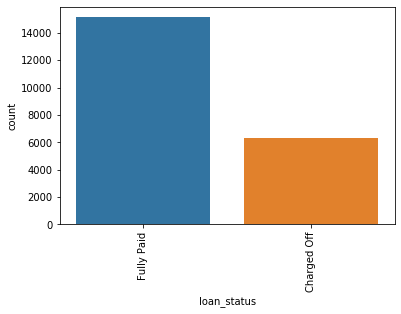

In [84]:
chart=sb.countplot('loan_status',data=loan_data,)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

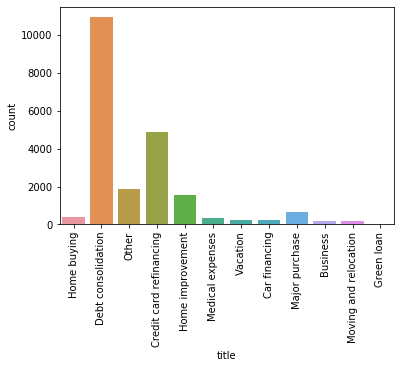

In [85]:
chart=sb.countplot('title',data=loan_data,)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

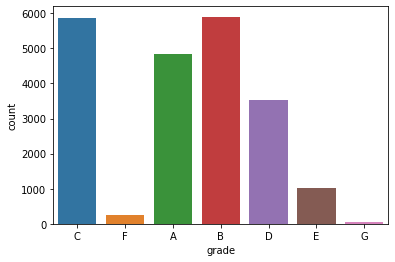

In [86]:
chart=sb.countplot('grade',data=loan_data,)
chart.set_xticklabels(chart.get_xticklabels())
plt.show()

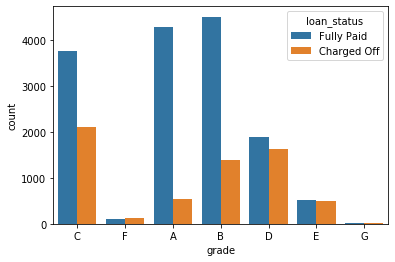

In [87]:
sb.countplot('grade',hue='loan_status',data=loan_data)
plt.show()

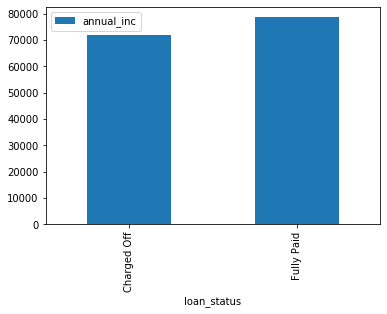

In [88]:
loan_data[['loan_status','annual_inc']].groupby(['loan_status']).mean().plot.bar()
plt.show()

In [28]:
ctab = pd.crosstab([loan_data['loan_status'],loan_data['grade']],loan_data.loan_status,margins=True).style.background_gradient(cmap='summer_r')
ctab

In [29]:
ctab1 = pd.crosstab([loan_data['loan_status'],loan_data['home_ownership']],loan_data.loan_status,margins=True).style.background_gradient(cmap='summer_r')
ctab1

In [30]:
import json

In [31]:
loan_data.to_json('loan.json')

In [32]:
# to bypass pandas missing json formatter we can format the data ourselves
df_json_pretty = json.dumps(json.loads(loan_data.to_json()), indent=4)
type(df_json_pretty)

str

In [33]:
df_json_pretty[:100]

'{\n    "id": {\n        "3": 134937497,\n        "5": 136055034,\n        "16": 135705528,\n        "17":'

In [34]:
with open('loan.json', 'w', encoding='utf-8') as f:
    f.write(df_json_pretty)

In [35]:
loan_data.to_csv('loan.csv', index=False)



In [36]:
loan_data_clean = pd.read_csv('loan.csv')

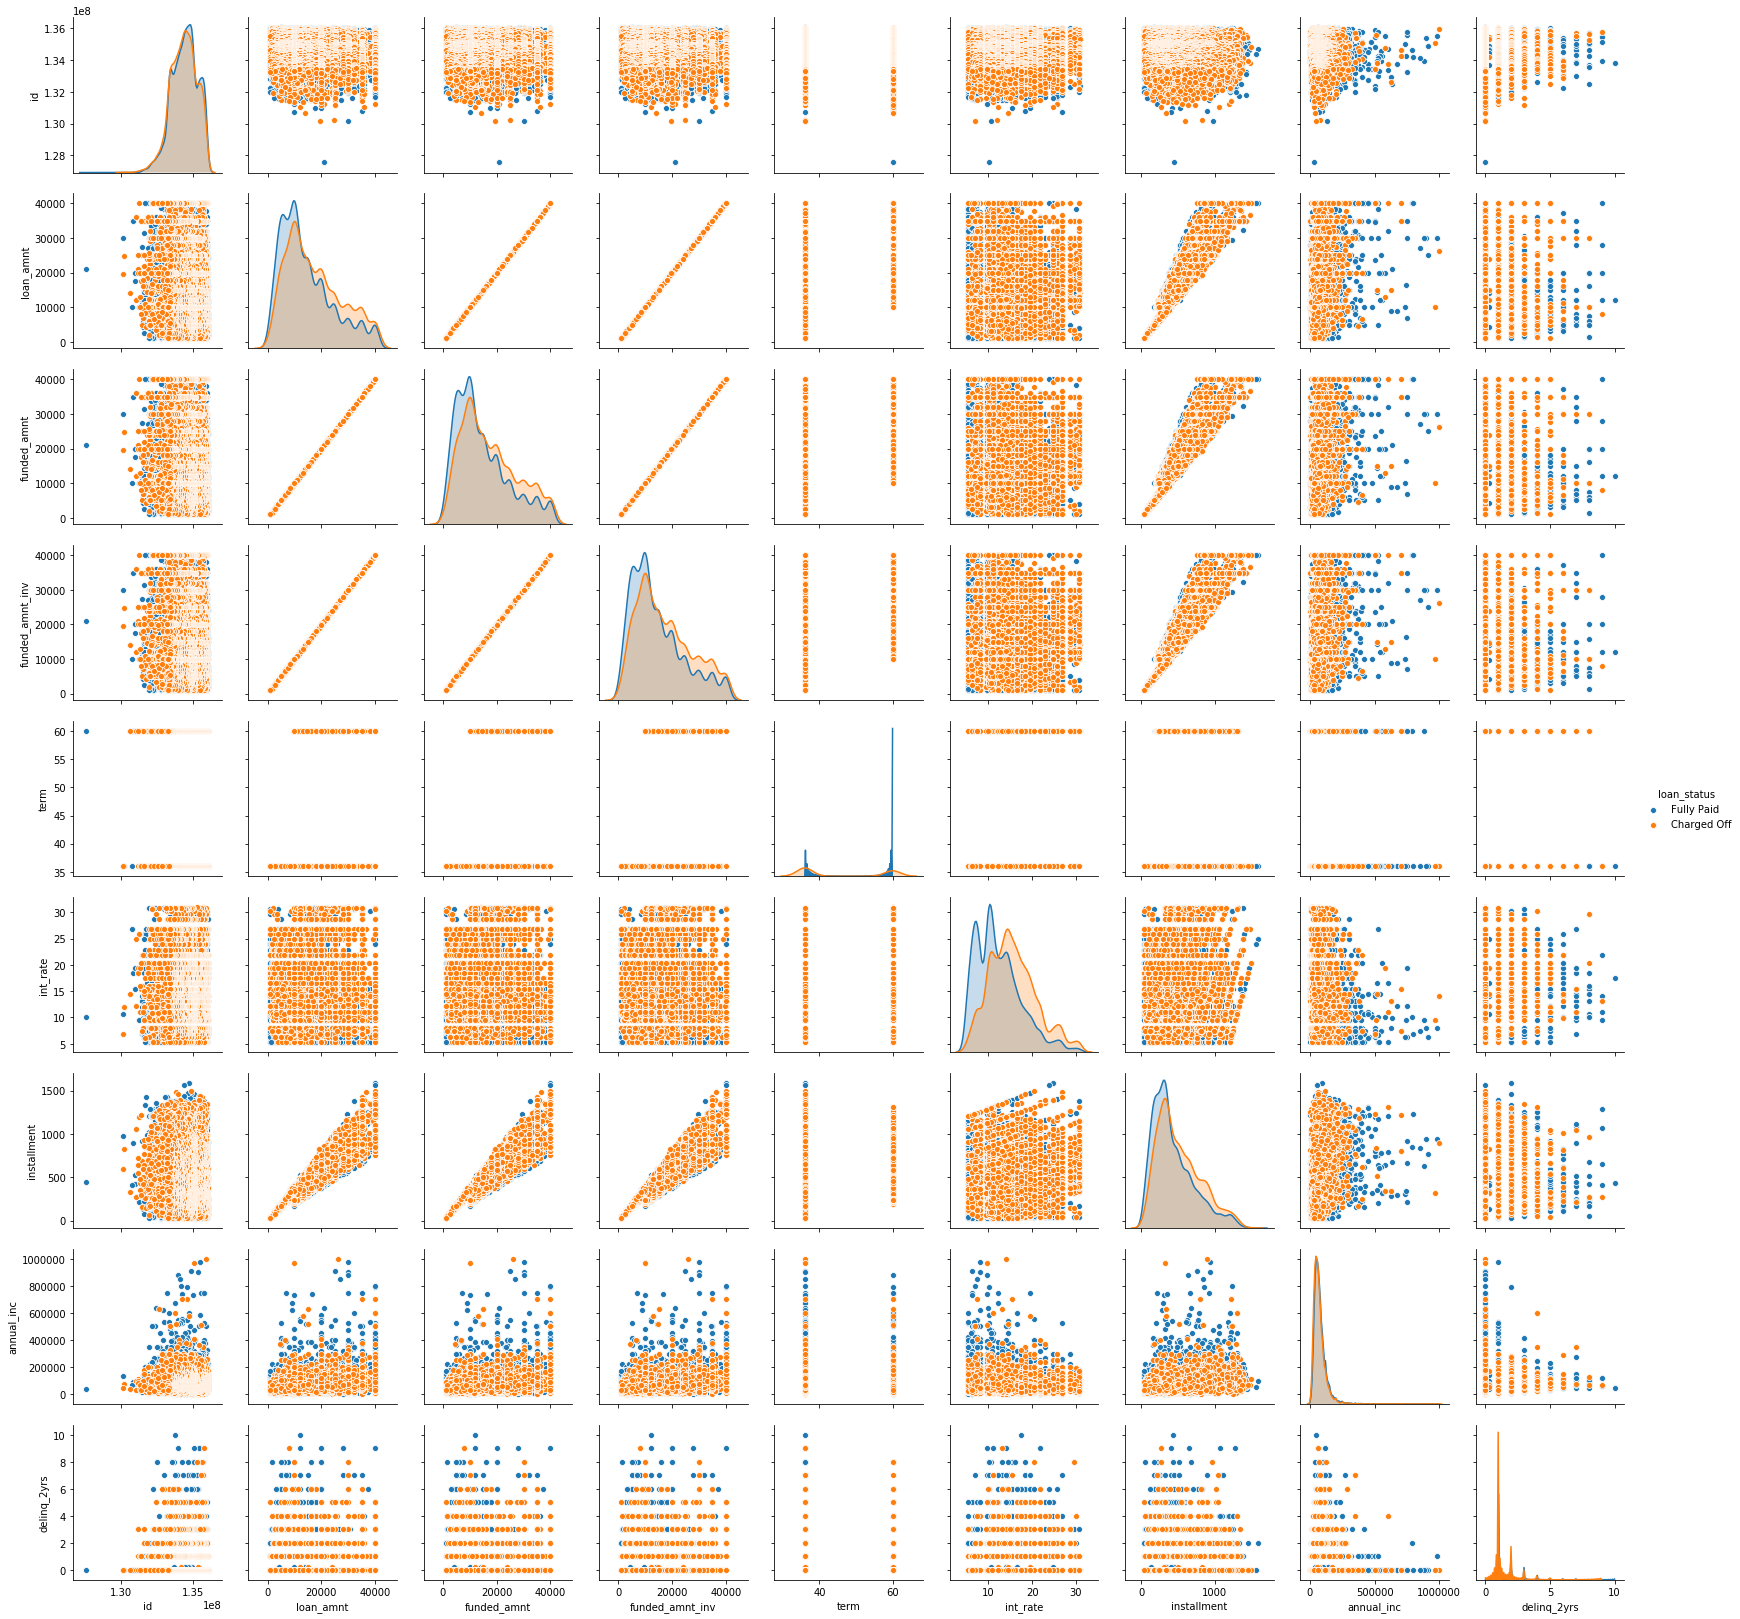

In [99]:
myplot = sb.pairplot(loan_data_clean, hue='loan_status')
myplot.savefig('loan_status.png')

In [37]:
import scipy.stats as stats

In [38]:
loan_data = pd.read_csv('loan.csv')

In [39]:
loan_data.columns.unique()

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'home_ownership', 'annual_inc',
       'issue_d', 'loan_status', 'title', 'delinq_2yrs'],
      dtype='object')

In [40]:
stats.entropy(loan_data_clean['annual_inc'])

9.80131610419752

In [41]:
for col in loan_data.columns:
    print("Entropy for: ", col, stats.entropy(loan_data[col].dropna()))

Entropy for:  id 9.973224972446587
Entropy for:  loan_amnt 9.765225554241368
Entropy for:  funded_amnt 9.765225554241368
Entropy for:  funded_amnt_inv 9.765197803813198
Entropy for:  term 9.943736228224218
Entropy for:  int_rate 9.89288628724697
Entropy for:  installment 9.781577257026937


TypeError: can't multiply sequence by non-int of type 'float'

## Bonus: Testing our data


In [105]:
assert 1 == 3

AssertionError: 

In [106]:
# We know that we should only have two classes
assert len(loan_data_clean['loan_status'].unique()) == 2

In [107]:
assert len(loan_data_clean['loan_status'].unique()) == 3

AssertionError: 

In [108]:
# We know that our data set should have no missing measurements
assert len(loan_data_clean.loc[(loan_data['loan_amnt'].isnull()) |
                  (loan_data['annual_inc'].isnull()) |
                  (loan_data['loan_status'].isnull()) |
                  (loan_data['int_rate'].isnull())]) == 0

In [109]:
# Annual income should be above 1
assert loan_data_clean.loc[loan_data_clean['loan_status'] == 'Fully Paid', 'annual_inc'].min() >= 1000

In [110]:
# Annual income should be above 1
assert loan_data_clean.loc[loan_data_clean['loan_status'] == 'Charged Off', 'annual_inc'].min() >= 1000

In [111]:
# Annual income should be below 1000000
assert loan_data_clean.loc[loan_data_clean['loan_status'] == 'Fully Paid', 'annual_inc'].max() <= 1000000

In [134]:
# Annual income should be below 1000000
assert loan_data_clean.loc[loan_data_clean['loan_status'] == 'Charged Off', 'annual_inc'].max() <= 1000000

In [112]:
assert loan_data_clean.loc[loan_data_clean['loan_status'] == 'Fully Paid', 'delinq_2yrs'].max() <= 10

In [113]:
assert loan_data_clean.loc[loan_data_clean['loan_status'] == 'Charged Off', 'delinq_2yrs'].max() <= 10

## Step 4: Exploratory analysis


''

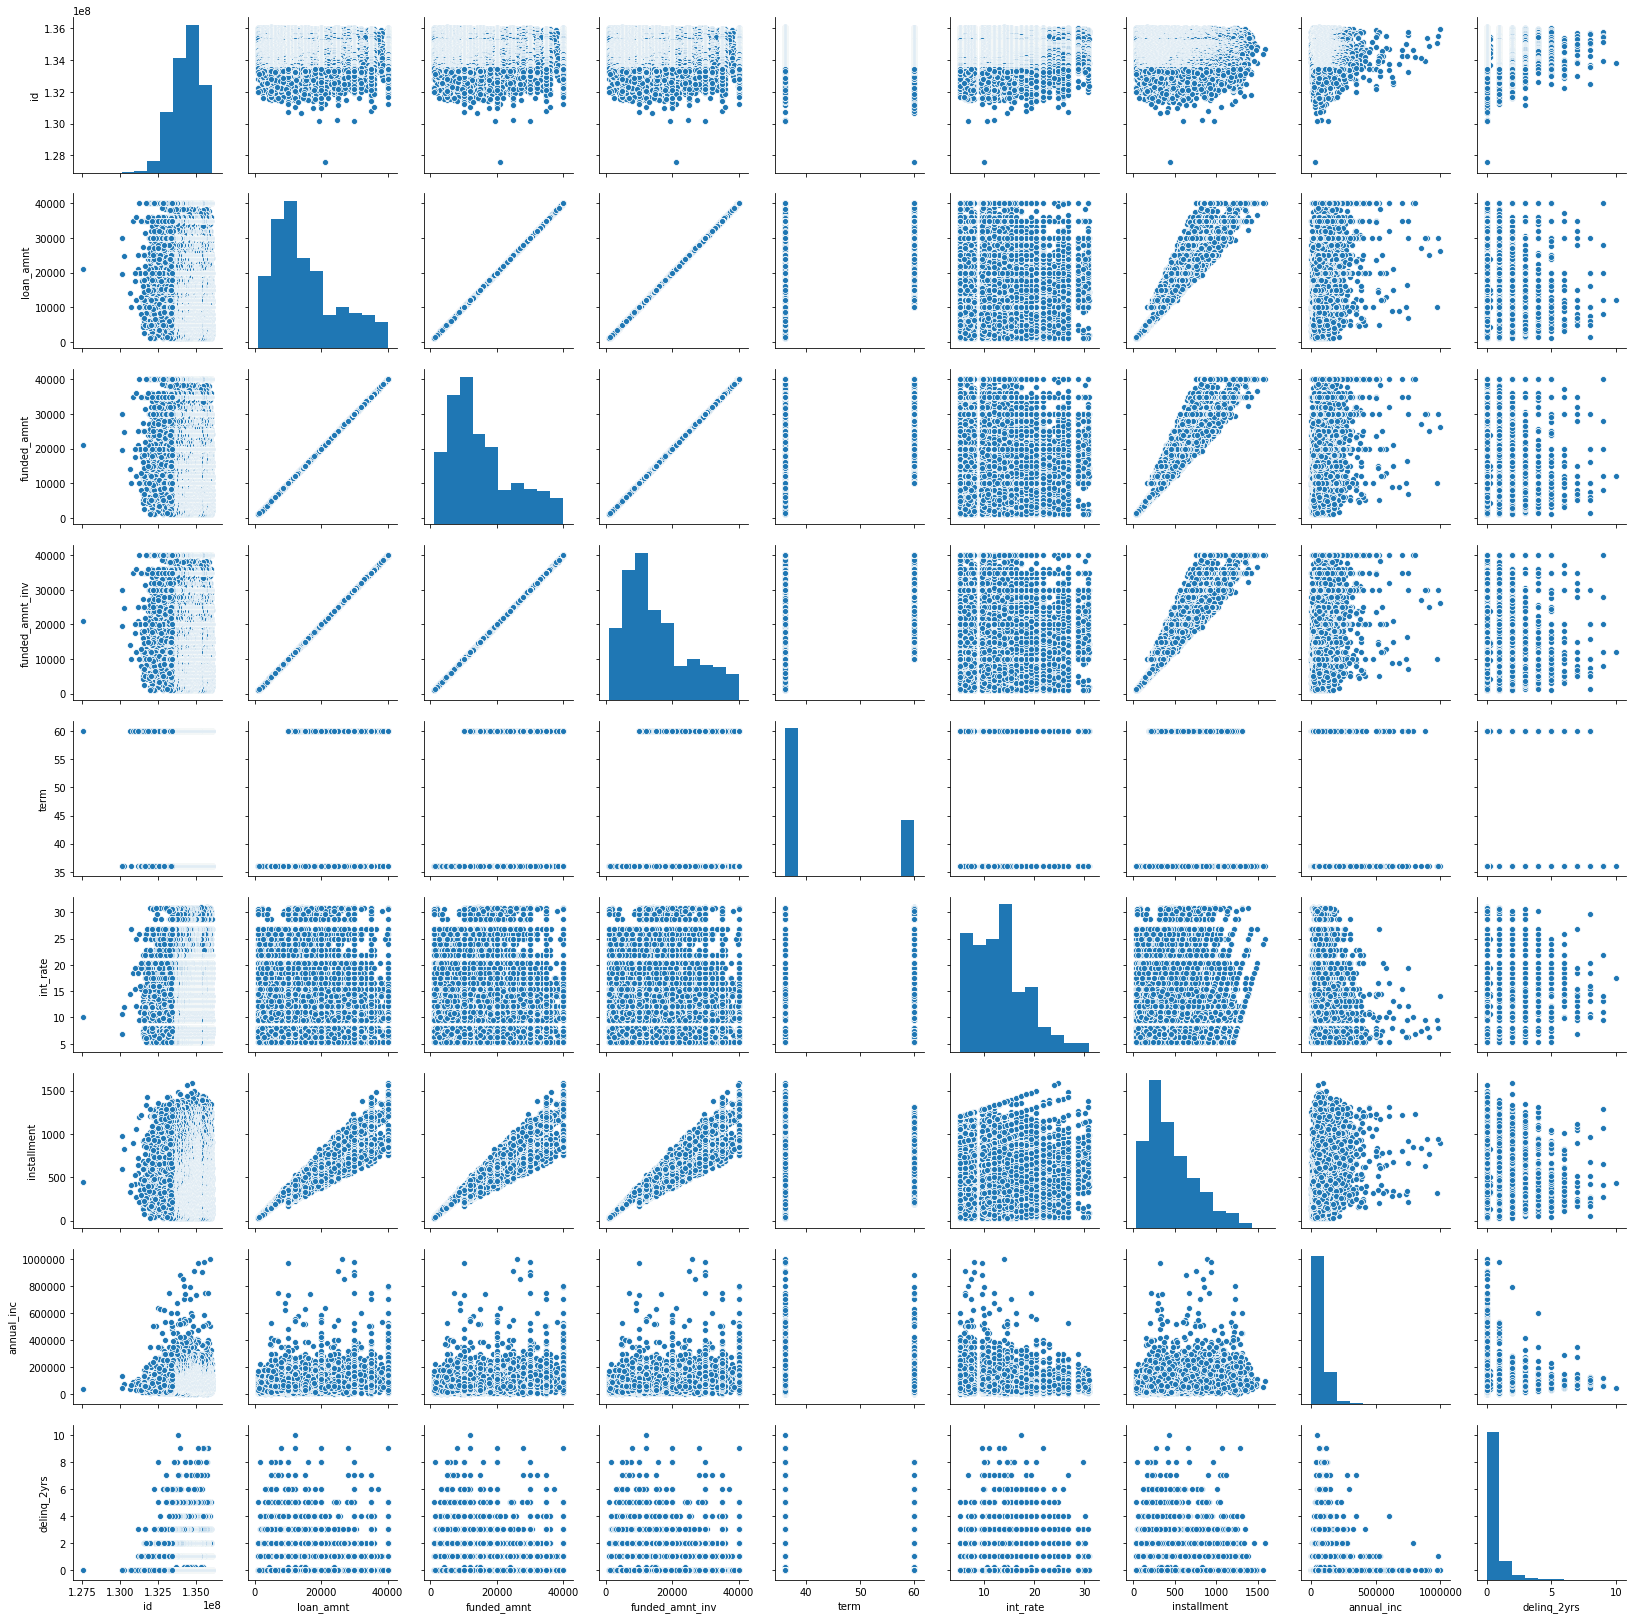

In [114]:
sb.pairplot(loan_data_clean)
;

''

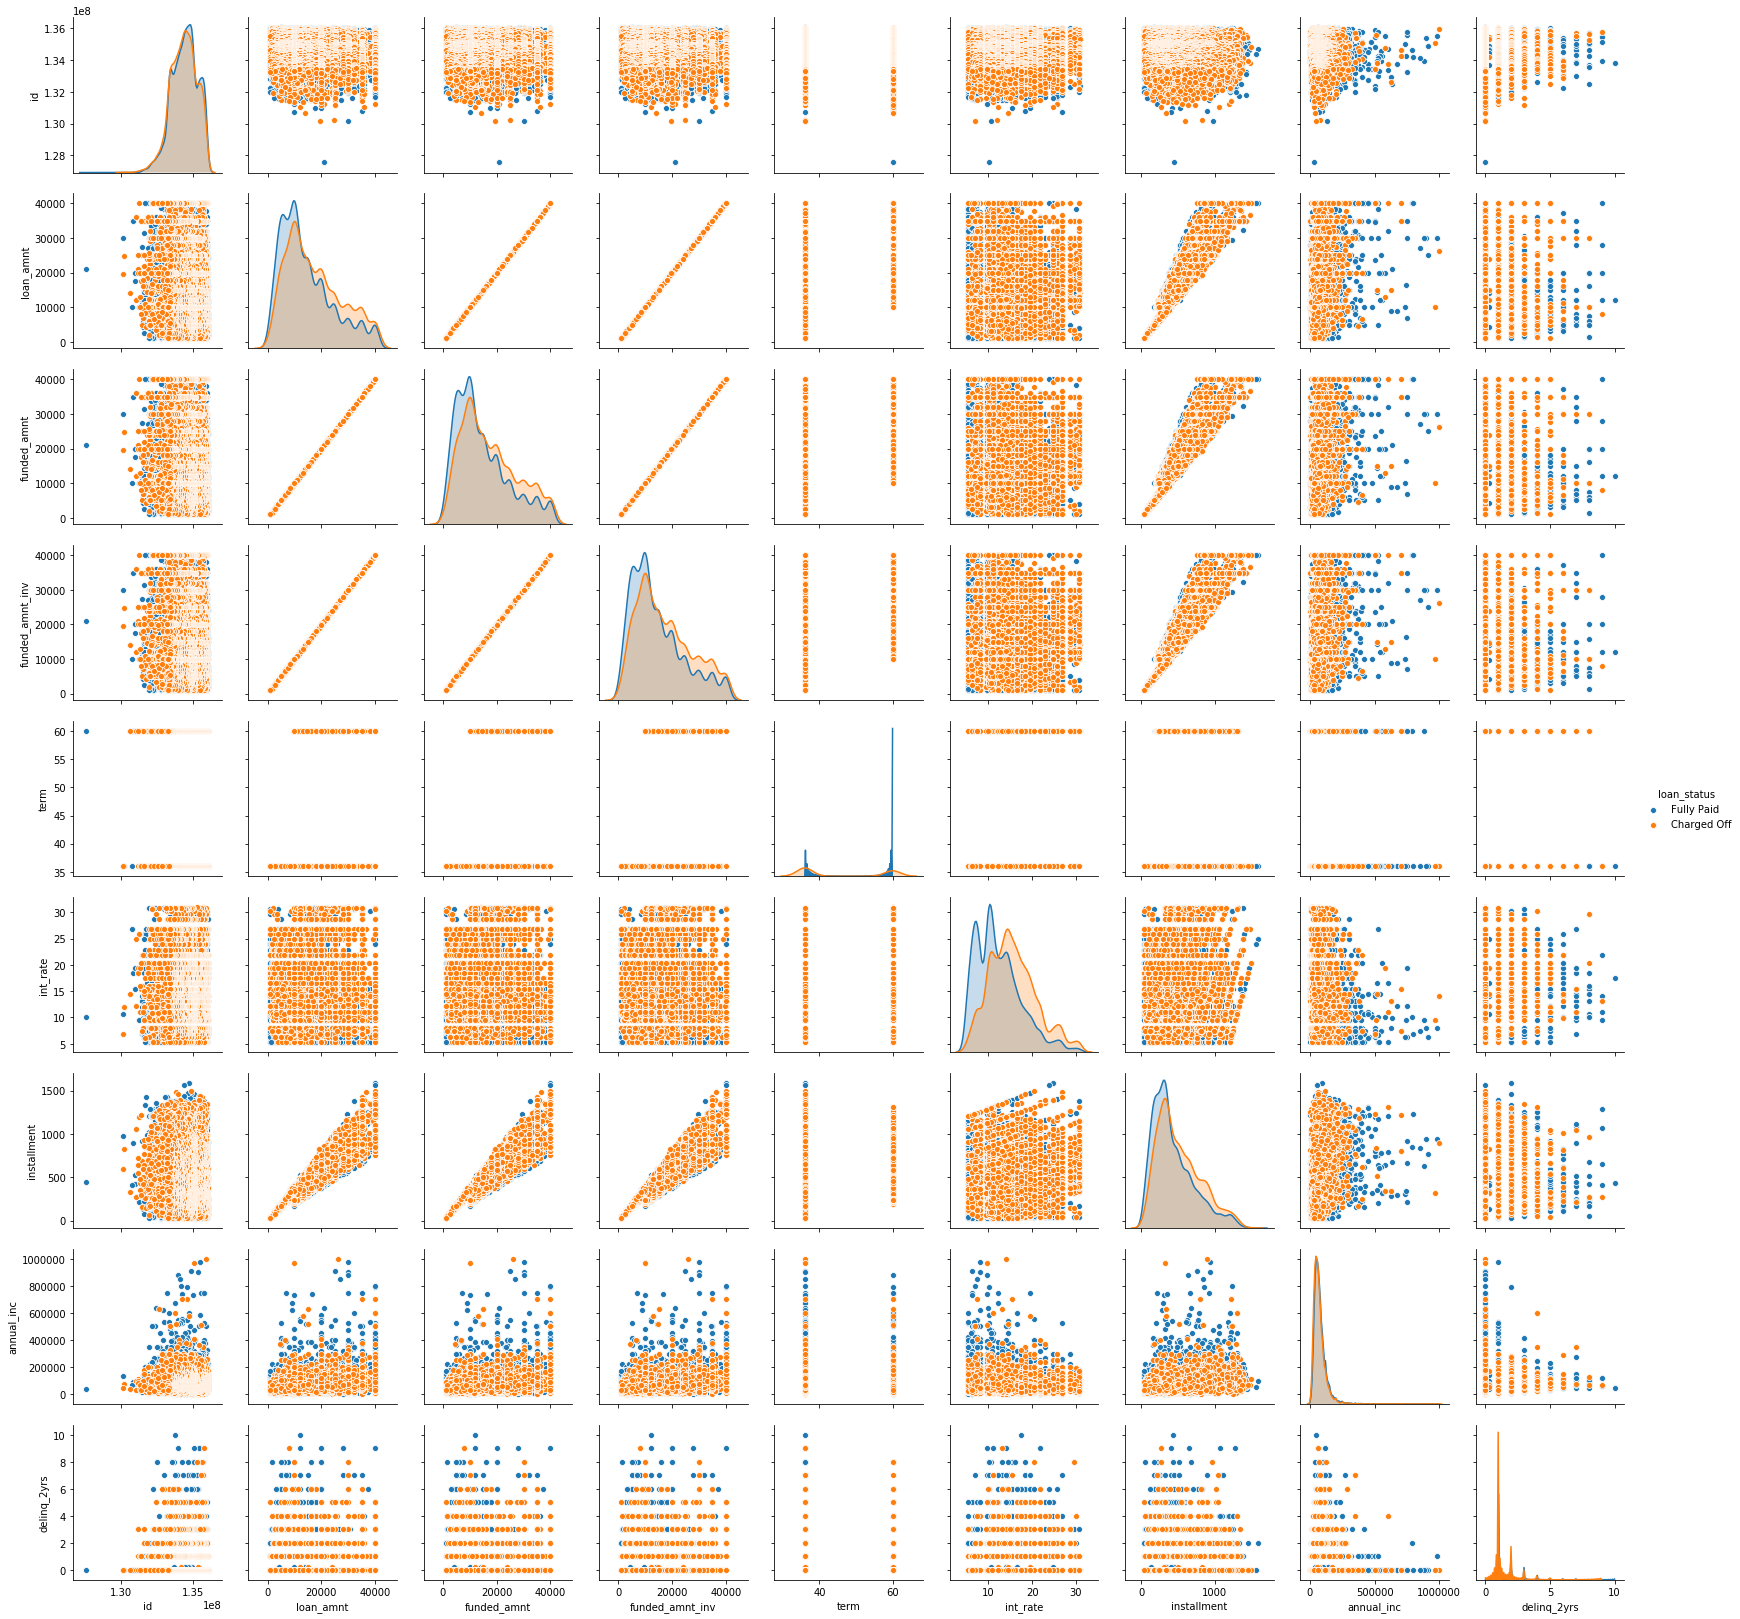

In [115]:
sb.pairplot(loan_data_clean, hue='loan_status')
;

## Step 5: Classification


In [42]:


# We're using Annual income, loan amount, interest rate, funded amount, installment four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,

# We can extract the data in this format from pandas like this:
# usually called X
all_inputs = loan_data_clean[['annual_inc', 'loan_amnt',
                             'int_rate', "funded_amnt", "installment","delinq_2yrs"]].values

# Similarly, we can extract the loan status labels
# answers/label often called little y
all_labels = loan_data_clean['loan_status'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[1.04000e+05, 3.00000e+04, 1.45200e+01, 3.00000e+04, 1.03293e+03,
        0.00000e+00],
       [1.10000e+05, 1.60000e+04, 2.87200e+01, 1.60000e+04, 5.05150e+02,
        0.00000e+00],
       [7.04000e+04, 3.47000e+04, 3.07500e+01, 3.47000e+04, 1.13871e+03,
        0.00000e+00],
       [6.20000e+04, 2.40000e+04, 6.83000e+00, 2.40000e+04, 7.39190e+02,
        0.00000e+00],
       [1.10000e+05, 1.30000e+04, 1.00700e+01, 1.30000e+04, 4.19910e+02,
        0.00000e+00]])

In [43]:
type(all_inputs)

numpy.ndarray

In [44]:
all_labels[:10]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [45]:
type(all_labels)

numpy.ndarray

Now our data is ready to be split.

In [46]:
all_inputs[:3]

array([[1.04000e+05, 3.00000e+04, 1.45200e+01, 3.00000e+04, 1.03293e+03,
        0.00000e+00],
       [1.10000e+05, 1.60000e+04, 2.87200e+01, 1.60000e+04, 5.05150e+02,
        0.00000e+00],
       [7.04000e+04, 3.47000e+04, 3.07500e+01, 3.47000e+04, 1.13871e+03,
        0.00000e+00]])

In [47]:
loan_data_clean.head(3)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  134937497      30000        30000            30000    36     14.52   
1  136055034      16000        16000            16000    60     28.72   
2  135705528      34700        34700            34700    60     30.75   

   installment grade                   emp_title home_ownership  annual_inc  \
0      1032.93     C  Quality Assurance Engineer           RENT    104000.0   
1       505.15     F        Utilities Specialist            OWN    110000.0   
2      1138.71     F                         Ceo       MORTGAGE     70400.0   

  issue_d loan_status               title  delinq_2yrs  
0    June  Fully Paid         Home buying          0.0  
1    June  Fully Paid  Debt consolidation          0.0  
2    June  Fully Paid  Debt consolidation          0.0

In [48]:
all_labels[:10]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Here we split our data into training and testing data
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [51]:
len(all_inputs)

21445

In [52]:
len(training_inputs)

16083

In [53]:
0.75*21445

16083.75

In [54]:
21445*0.25

5361.25

In [55]:
len(testing_inputs)

5362

In [56]:
training_inputs[:5]

array([[6.5000e+04, 1.2000e+04, 1.1050e+01, 1.2000e+04, 2.6121e+02,
        2.0000e+00],
       [1.3500e+05, 1.2000e+04, 2.8720e+01, 1.2000e+04, 3.7886e+02,
        0.0000e+00],
       [4.8692e+04, 2.8800e+04, 1.2130e+01, 2.8800e+04, 6.4254e+02,
        0.0000e+00],
       [2.5000e+04, 1.0000e+04, 7.4600e+00, 1.0000e+04, 3.1088e+02,
        0.0000e+00],
       [1.5000e+05, 1.5000e+04, 3.0750e+01, 1.5000e+04, 4.9224e+02,
        0.0000e+00]])

In [57]:
testing_inputs[:5]

array([[6.00000e+04, 3.50000e+04, 1.74700e+01, 3.50000e+04, 8.78710e+02,
        0.00000e+00],
       [5.44290e+04, 7.00000e+03, 1.10500e+01, 7.00000e+03, 2.29340e+02,
        0.00000e+00],
       [1.00000e+05, 1.55000e+04, 1.40700e+01, 1.55000e+04, 3.61230e+02,
        0.00000e+00],
       [1.80000e+04, 3.50000e+03, 5.31000e+00, 3.50000e+03, 1.05390e+02,
        0.00000e+00],
       [9.00000e+04, 4.00000e+04, 1.00700e+01, 4.00000e+04, 1.29201e+03,
        0.00000e+00]])

In [58]:
testing_classes[:10]

array(['Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid',
       'Charged Off', 'Charged Off', 'Charged Off', 'Charged Off',
       'Fully Paid', 'Charged Off'], dtype=object)

In [59]:
training_classes[:10]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off',
       'Charged Off', 'Fully Paid', 'Fully Paid', 'Charged Off',
       'Charged Off', 'Fully Paid'], dtype=object)

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.624580380455054

In [61]:
1-1/5364

0.999813571961223

In [62]:
decision_tree_classifier.score(training_inputs, training_classes)

0.9735745818566188

In [63]:
# lets try a cooler model SVM - Support Vector Machines
from sklearn import svm
svm_classifier = svm.SVC(gamma = 'scale')

In [64]:
svm_classifier.fit(training_inputs, training_classes)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
svm_classifier.score(testing_inputs, testing_classes)

0.7070123088399851

In [66]:
svm_classifier = svm.SVC(gamma = 'scale')
svm_classifier.fit(training_inputs, training_classes)
svm_classifier.score(testing_inputs, testing_classes)

0.7070123088399851

In [67]:
import matplotlib.pyplot as plt

''

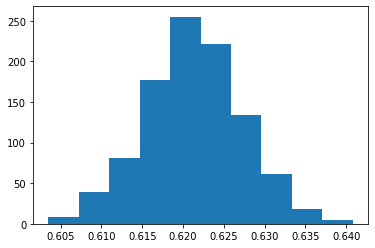

In [68]:
# here we randomly split data 1000 times in differrent training and test sets
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    # notice how we do not specify a seed so 1000 times we perform a random split
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

In [69]:
max(model_accuracies)

0.6408056695262961

In [70]:
min(model_accuracies)

0.6035061544199926

In [71]:
from collections import Counter

In [72]:
acc_count = Counter(model_accuracies)
acc_count

Counter({0.6253263707571801: 8,
         0.6256993659082432: 7,
         0.6264453562103692: 6,
         0.6290563222678105: 11,
         0.628869824692279: 4,
         0.6214099216710183: 13,
         0.6217829168220813: 13,
         0.6333457665050354: 2,
         0.6154419992540097: 6,
         0.6195449459157031: 21,
         0.6141365162252891: 8,
         0.6158149944050727: 9,
         0.6247668780305856: 10,
         0.6227154046997389: 11,
         0.6221559119731443: 12,
         0.6258858634837747: 10,
         0.6210369265199552: 19,
         0.6314807907497203: 3,
         0.6292428198433421: 6,
         0.6174934725848564: 10,
         0.613390525923163: 9,
         0.6348377471092875: 2,
         0.613763521074226: 6,
         0.6232748974263335: 13,
         0.623834390152928: 13,
         0.6279373368146214: 7,
         0.6275643416635583: 7,
         0.6167474822827304: 6,
         0.6189854531891086: 8,
         0.6234613950018649: 11,
         0.6236478925773965: 9,



### Cross-validation


In [149]:
loan_data_clean.head(15)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0   134937497      30000        30000            30000    36     14.52   
1   136055034      16000        16000            16000    60     28.72   
2   135705528      34700        34700            34700    60     30.75   
3   135788850      24000        24000            24000    36      6.83   
4   134912479      13000        13000            13000    36     10.07   
5   136057039       5000         5000             5000    36      8.08   
6   135976116      30000        30000            30000    60     21.85   
7   136055010      20000        20000            20000    60     26.77   
8   135936858      10000        10000            10000    36     20.39   
9   135252445       6000         6000             6000    36     22.90   
10  135942732       8000         8000             8000    36      8.08   
11  135473151       6000         6000             6000    36     16.46   
12  135993562       5000         5000             5000    36     23.87   
13  135850558      21000        21000            21000    60     20.39   
14  135957014      14400        14400            14400    60     21.85   

    installment grade                            emp_title home_ownership  \
0       1032.93     C           Quality Assurance Engineer           RENT   
1        505.15     F                 Utilities Specialist            OWN   
2       1138.71     F                                  Ceo       MORTGAGE   
3        739.19     A                             Adjuster           RENT   
4        419.91     B                    Assistant manager           RENT   
5        156.87     A                   Blending operator            RENT   
6        826.02     D  Supervising Police Radio Dispatcher       MORTGAGE   
7        607.97     E                                 HRSS       MORTGAGE   
8        373.63     D                              Realtor            OWN   
9        231.95     E                       Office Manager            OWN   
10       250.99     A               production accountant            RENT   
11       212.31     C                                  NaN            OWN   
12       195.83     E                                Nurse           RENT   
13       560.94     D                      General Manager       MORTGAGE   
14       396.49     D                   Underground Miner        MORTGAGE   

    annual_inc issue_d  loan_status                    title  delinq_2yrs  
0     104000.0    June   Fully Paid              Home buying          0.0  
1     110000.0    June   Fully Paid       Debt consolidation          0.0  
2      70400.0    June   Fully Paid       Debt consolidation          0.0  
3      62000.0    June   Fully Paid       Debt consolidation          0.0  
4     110000.0    June   Fully Paid       Debt consolidation          0.0  
5      60000.0    June   Fully Paid                    Other          0.0  
6      56808.0    June  Charged Off  Credit card refinancing          0.0  
7      65000.0    June  Charged Off       Debt consolidation          0.0  
8      26000.0    June   Fully Paid       Debt consolidation          0.0  
9      74000.0    June   Fully Paid       Debt consolidation          0.0  
10     62000.0    June   Fully Paid  Credit card refinancing          0.0  
11     20388.0    June  Charged Off       Debt consolidation          0.0  
12     65000.0    June   Fully Paid       Debt consolidation          0.0  
13    125000.0    June  Charged Off       Debt consolidation          0.0  
14    135000.0    June   Fully Paid       Debt consolidation          1.0

In [150]:
loan_data_clean.tail()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
21440  133424372      40000        40000            40000    36      5.31   
21441  133279749      12000        12000            12000    36     14.52   
21442  132871073       8500         8500             8500    36     23.87   
21443  133348211      22000        22000            22000    36      5.31   
21444  133420689      10000        10000            10000    60     11.05   

       installment grade                 emp_title home_ownership  annual_inc  \
21440      1204.42     A  Senior forensic engineer       MORTGAGE    138000.0   
21441       413.17     C           Kitchen Manager           RENT     56500.0   
21442       332.90     E           general manager       MORTGAGE     65000.0   
21443       662.43     A         Director of Sales       MORTGAGE    215000.0   
21444       217.68     B              Tax Examiner            OWN     56471.0   

      issue_d  loan_status                    title  delinq_2yrs  
21440     May   Fully Paid       Debt consolidation          0.0  
21441     May   Fully Paid  Credit card refinancing          0.0  
21442     May  Charged Off       Debt consolidation          0.0  
21443     May   Fully Paid       Debt consolidation          0.0  
21444     May   Fully Paid       Debt consolidation          0.0

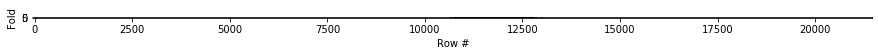

In [73]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

In [74]:
from sklearn.model_selection import cross_val_score

''

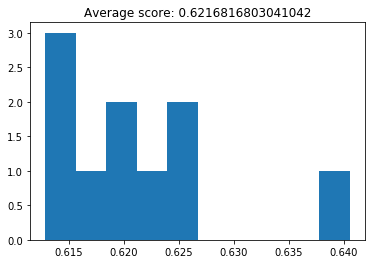

In [75]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [76]:
cv_scores

array([0.61958042, 0.62564103, 0.62097902, 0.61771562, 0.62331002,
       0.62657343, 0.64055944, 0.61287313, 0.61502566, 0.61455903])

In [77]:
len(all_inputs.T[1])

21445

In [78]:
import scipy.stats as stats

In [79]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
# https://en.wikipedia.org/wiki/Entropy_(information_theory)
print("Entropy for: ",  stats.entropy(all_inputs.T[1]))

Entropy for:  9.765225554241368


In [80]:
# we go through list of column names except last one and get entropy 
# for data (without missing values) in each column
def printEntropy(npdata):
    for i, col in enumerate(npdata.T):
        print("Entropy for column:", i, stats.entropy(col))

In [81]:
printEntropy(all_inputs)

Entropy for column: 0 9.80131610419752
Entropy for column: 1 9.765225554241368
Entropy for column: 2 9.89288628724697
Entropy for column: 3 9.765225554241368
Entropy for column: 4 9.781577257026937
Entropy for column: 5 7.911528026954792


''

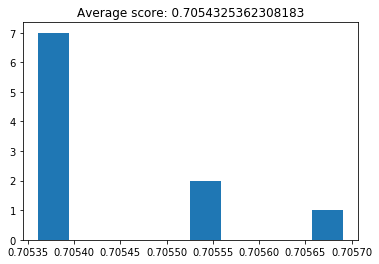

In [82]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [83]:
# prepare to grid and to fit
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

# the parameters will depend on the model we use above
parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)


grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

In [84]:


# here the grid search will loop through all parameter combinations and fit the model to cross validated splits
grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7088831895546748
Best parameters: {'max_depth': 4, 'max_features': 4}


In [85]:
type(grid_search)

sklearn.model_selection._search.GridSearchCV

In [86]:
grid_search.estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
grid_search.param_grid

{'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4]}

In [88]:
type(grid_search.param_grid)

dict

In [89]:
grid_search.cv

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [90]:
grid_search.cv_results_['mean_test_score']

array([0.7054325 , 0.7054325 , 0.7054325 , 0.7054325 , 0.7054325 ,
       0.7054325 , 0.7054325 , 0.7054325 , 0.70515272, 0.70389368,
       0.70566566, 0.703474  , 0.70463978, 0.70599207, 0.70743763,
       0.70888319, 0.70673817, 0.70687806, 0.70888319, 0.70827699])

In [91]:
cv_res = grid_search.cv_results_['mean_test_score']
cv_res.shape

(20,)

In [92]:
import seaborn as sb

''

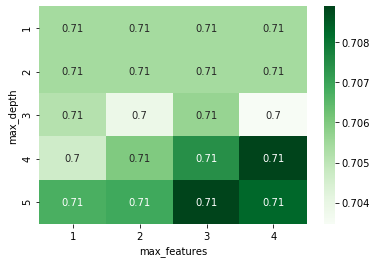

In [93]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Greens', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.savefig("grid_heatmap.png")
;

In [171]:
plt.savefig("empty.jpg")

<Figure size 432x288 with 0 Axes>

In [95]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7102354861273024
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'splitter': 'random'}


In [96]:
# we pick the best one and save for now in a different variable
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [97]:
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

''

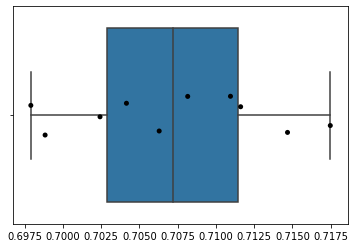

In [98]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')
;

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.6691536488692003
Best parameters: {'criterion': 'entropy', 'max_features': 4, 'n_estimators': 100}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)
both_df.head()

accuracy     classifier
0  0.662005  Random Forest
1  0.678322  Random Forest
2  0.664336  Random Forest
3  0.655478  Random Forest
4  0.670862  Random Forest

In [180]:
both_df

accuracy     classifier
0  0.662005  Random Forest
1  0.678322  Random Forest
2  0.664336  Random Forest
3  0.655478  Random Forest
4  0.670862  Random Forest
5  0.675058  Random Forest
6  0.672261  Random Forest
7  0.660914  Random Forest
8  0.662622  Random Forest
9  0.663089  Random Forest
0  0.697902  Decision Tree
1  0.703963  Decision Tree
2  0.714685  Decision Tree
3  0.700699  Decision Tree
4  0.718415  Decision Tree
5  0.715152  Decision Tree
6  0.707692  Decision Tree
7  0.701493  Decision Tree
8  0.707886  Decision Tree
9  0.705553  Decision Tree

''

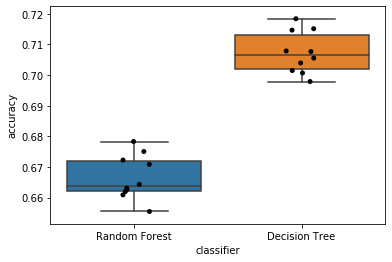

In [181]:


sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

In [101]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

/Users/aiga_krauze/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.1100e+05 5.0000e+03 9.9200e+00 5.0000e+03 1.6115e+02 0.0000e+00]	-->	Fully Paid	(Actual: Fully Paid)
[6.3000e+04 2.5000e+04 1.0070e+01 2.5000e+04 8.0751e+02 0.0000e+00]	-->	Charged Off	(Actual: Fully Paid)
[1.9800e+05 7.2000e+03 1.3060e+01 7.2000e+03 2.4281e+02 0.0000e+00]	-->	Fully Paid	(Actual: Charged Off)
[7.8000e+04 1.0000e+04 6.1900e+00 1.0000e+04 3.0509e+02 0.0000e+00]	-->	Fully Paid	(Actual: Fully Paid)
[7.50000e+04 3.50000e+04 6.83000e+00 3.50000e+04 1.07799e+03 0.00000e+00]	-->	Charged Off	(Actual: Fully Paid)
[4.000e+04 1.140e+04 3.065e+01 1.140e+04 3.734e+02 1.000e+00]	-->	Fully Paid	(Actual: Charged Off)
[9.3000e+04 1.0000e+04 1.9420e+01 1.0000e+04 2.6173e+02 0.0000e+00]	-->	Charged Off	(Actual: Fully Paid)
[4.2000e+04 6.0000e+03 2.6770e+01 6.0000e+03 2.4422e+02 0.0000e+00]	-->	Charged Off	(Actual: Charged Off)
[3.6500e+04 4.0000e+03 1.0070e+01 4.0000e+03 1.2921e+02 0.0000e+00]	-->	Fully Paid	(Actual: Fully Paid)
[6.230e+04 7.650e+03 1.646e+01 7.650e+03 2.707e+02 0.000e